In [1]:
import numpy as np 
import pandas as pd 
import random as rnd

import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns
%matplotlib inline

import sklearn
import warnings
warnings.filterwarnings("ignore")

# machine learning
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn import metrics
from sklearn.metrics import classification_report, silhouette_score
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
from sklearn import linear_model #Linear Regression
from sklearn.model_selection import KFold
from sklearn.metrics import make_scorer
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import svm
from sklearn.cluster import KMeans # KMeans clustering 
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt # Python defacto plotting library
import seaborn as sns # More snazzy plotting library
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
df = pd.read_csv("top10s.csv", index_col=0, header=0,encoding='ISO-8859-1') 
df

,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
1,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
2,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
3,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
4,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
5,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599,Find U Again (feat. Camila Cabello),Mark Ronson,dance pop,2019,104,66,61,-7,20,16,176,1,3,75
600,Cross Me (feat. Chance the Rapper & PnB Rock),Ed Sheeran,pop,2019,95,79,75,-6,7,61,206,21,12,75
601,"No Brainer (feat. Justin Bieber, Chance the Ra...",DJ Khaled,dance pop,2019,136,76,53,-5,9,65,260,7,34,70
602,Nothing Breaks Like a Heart (feat. Miley Cyrus),Mark Ronson,dance pop,2019,114,79,60,-6,42,24,217,1,7,69


In [3]:
#Renaming the columns
df.rename(columns={'title':'Track Name','artist':'Artist Name','bpm':'Beats Per Minute','top genre':'Genre','nrgy':'Energy','dnce':'Danceability', 'dB':'Loudness dB','spch':'Speechiness','live':'Liveness','val':'Valence','dur':'Length','acous':'Acousticness','pop':'Popularity'},inplace=True)
f = df.drop(df.index[[50, 138, 267, 362, 442]])
df = df.reset_index()
df = df.drop(['Track Name','Artist Name','Genre','year','index'], axis =1)
df.head()

,Beats Per Minute,Energy,Danceability,Loudness dB,Liveness,Valence,Length,Acousticness,Speechiness,Popularity
0,97,89,67,-4,8,80,217,19,4,83
1,87,93,75,-5,52,64,263,24,23,82
2,120,84,76,-3,29,71,200,10,14,80
3,119,92,70,-4,8,71,295,0,4,79
4,109,84,64,-5,9,43,221,2,4,78


In [4]:
train_df = df[0:int(len(df)*0.6)]
X_train = train_df.drop(['Popularity'],axis=1)
y_train = train_df['Popularity']
test_df = df[int(len(df)*0.6):len(df)]
X_test = test_df.drop(['Popularity'],axis=1)
y_test = test_df['Popularity']

In [5]:
# Logistic Regression
model_Logistic = LogisticRegression()
model_Logistic.fit(X_train, y_train)
y_pred = model_Logistic.predict(X_test)
acc_log = round(model_Logistic.score(X_train,y_train)*100,2)
acc_log

17.45

In [6]:
coe_df = pd.DataFrame(train_df.columns.delete(0))
coe_df.columns = ['Feature']
coe_df['Correlation'] = pd.Series(model_Logistic.coef_[0])
coe_df.sort_values(by='Correlation',ascending=False)

,Feature,Correlation
3,Liveness,0.725410
1,Danceability,0.134038
4,Valence,0.048793
7,Speechiness,0.021555
6,Acousticness,0.001815
5,Length,-0.031504
0,Energy,-0.047541
2,Loudness dB,-0.060152
8,Popularity,-0.607645


In [7]:
# Support Vector Machines
model_svc = SVC()
model_svc.fit(X_train,y_train)
y_pre = model_svc.predict(X_test)
acc_svc = round(model_svc.score(X_train,y_train)*100,2)
acc_svc

99.72

In [8]:
# KNN neighbors
model_KNN = KNeighborsClassifier(n_neighbors = 3)
model_KNN.fit(X_train,y_train)
y_pre = model_KNN.predict(X_test)
acc_KNN = round(model_KNN.score(X_train,y_train)*100,2)
acc_KNN

34.35

In [9]:
# Gaussian Naive Bayes
model_Gaussian = GaussianNB()
model_Gaussian.fit(X_train,y_train)
y_pre = model_Gaussian.predict(X_test)
acc_Gaussian = round(model_Gaussian.score(X_train,y_train)*100,2)
acc_Gaussian

26.87

In [10]:
# Perceptron
model_Perceptron = Perceptron()
model_Perceptron.fit(X_train,y_train)
y_pre = model_Perceptron.predict(X_test)
acc_Perceptron = round(model_Perceptron.score(X_train,y_train)*100,2)
acc_Perceptron

5.54

In [11]:
# Linear SVC
model_LinearSVC = LinearSVC()
model_LinearSVC.fit(X_train,y_train)
y_pre = model_LinearSVC.predict(X_test)
acc_LinearSVC = round(model_LinearSVC.score(X_train,y_train)*100,2)
acc_LinearSVC

3.6

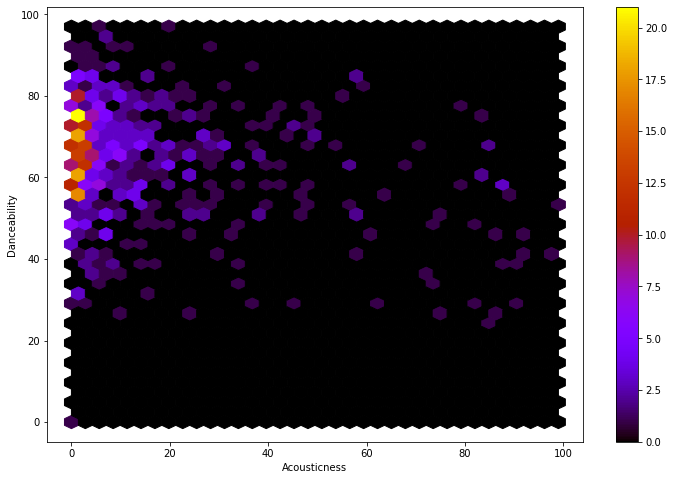

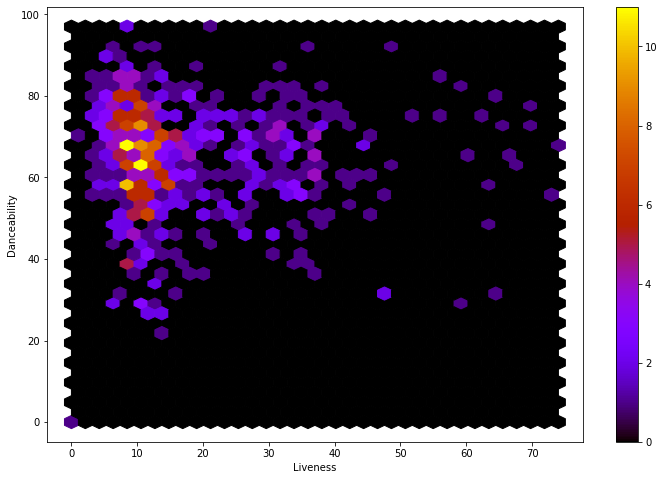

In [39]:
df.plot(y='Danceability',x='Acousticness',kind='hexbin',gridsize=35,sharex=False,colormap='gnuplot',figsize=(12,8))
df.plot(y='Danceability',x='Liveness',kind='hexbin',gridsize=35,sharex=False,colormap='gnuplot',figsize=(12,8))

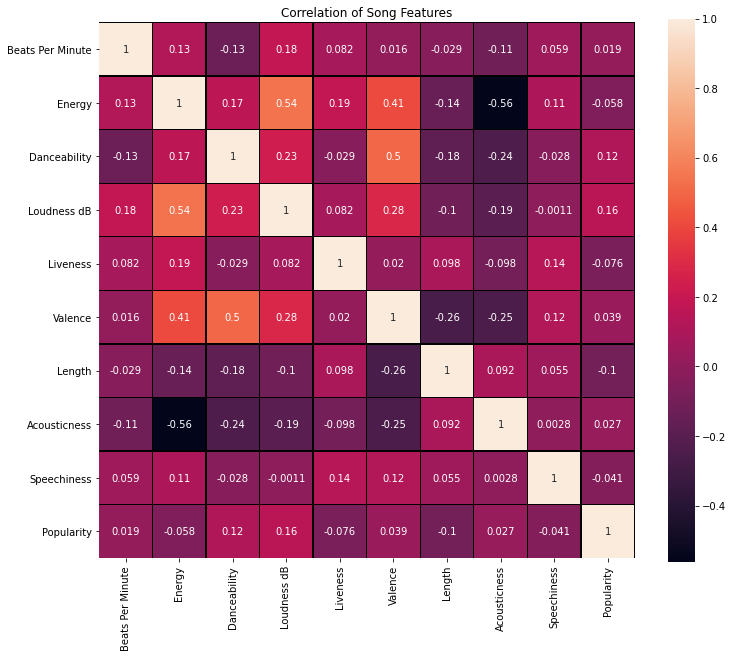

In [40]:
f,ax = plt.subplots(figsize=(12,10))
plt.title('Correlation of Song Features')

sns.heatmap(df.astype(float).corr(),linewidths=0.25,vmax=1.0,square=True,linecolor='black',annot=True)

In [14]:
# Calculating Eigenvectors and Eigenvalues of Covmatrix
from sklearn.preprocessing import StandardScaler
df_std = StandardScaler().fit_transform(df)
mean_vec = np.mean(df_std,axis=0)
cov_mat = np.cov(df_std.T)
eig_val,eig_vec = np.linalg.eig(cov_mat)

In [15]:
# make list of (eigenvalue, eigenvector) tuples
eig_pair = [(np.abs(eig_val[i]),eig_vec[:,i])for i in range(len(eig_val))]
# sort from high to low
eig_pair.sort(key=lambda x:x[0],reverse=True)
# calculating explained variance from the eitenvalues
tot = sum(eig_val)
var_exp = [(i/tot)*100 for i in sorted(eig_val,reverse=True)]
cum_var_exp = np.cumsum(var_exp)
len(cum_var_exp)

10

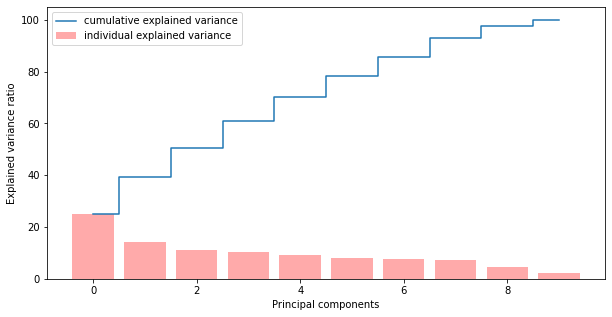

In [41]:
# plot the explained variances superimposed
plt.figure(figsize=(10,5))
plt.bar(range(len(cum_var_exp)),var_exp,alpha=0.3333,align='center',label='individual explained variance',color='r')
plt.step(range(len(cum_var_exp)),cum_var_exp,where='mid',label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.show()

In [17]:
# top 6 components
model_pca = PCA(n_components = 6)
df_6 = model_pca.fit_transform(df_std)
df_6

array([[-1.25119645, -1.35000247, -0.25777488,  0.07251231, -0.6078483 ,
        -0.36378854],
       [-1.21246656,  1.33878178,  1.65028597,  2.38835322, -2.06022336,
         0.74195254],
       [-1.94005221, -0.10845455, -0.08404945,  1.20624948, -0.29801108,
         0.56692433],
       ...,
       [-0.388924  ,  1.6768579 ,  0.41061005,  2.27213349,  0.93507988,
        -2.19799823],
       [-0.00393844,  1.25957986, -0.08132412, -0.32165894, -0.79300609,
         1.57002199],
       [ 1.44998768, -0.29541527, -0.69454378, -0.32354677,  0.78700709,
         0.26421381]])

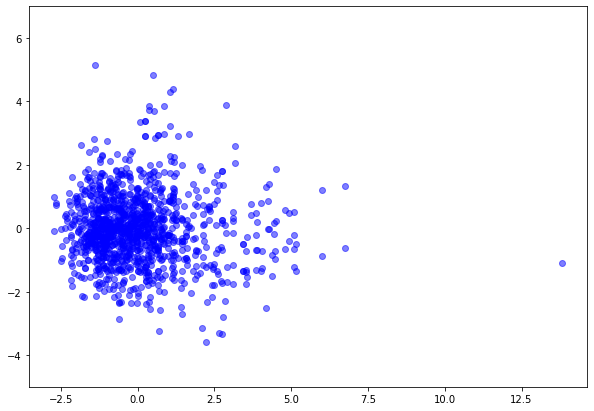

In [43]:
# plot the PCA model
plt.figure(figsize = (10,7))
plt.scatter(df_6[:,0],df_6[:,1],c='b',alpha=0.5)
plt.scatter(df_6[:,0],df_6[:,2],c='b',alpha=0.5)
plt.ylim(-5,7)
plt.show()

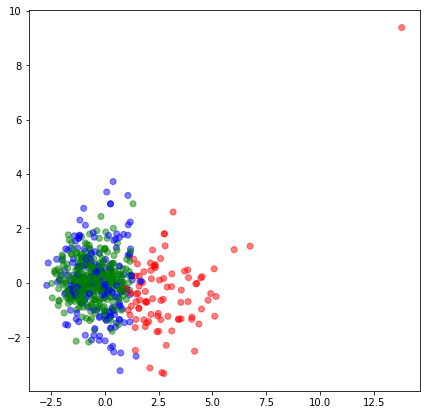

In [19]:
# KMeans clustering 3
kmeans = KMeans(n_clusters=3)
df_clustered = kmeans.fit_predict(df_6)

LABEL_color = {0:'r',1:'g',2:'b'}
label_color = [LABEL_color[l] for l in df_clustered]

plt.figure(figsize = (7,7))
plt.scatter(df_6[:,0],df_6[:,2],c=label_color,alpha=0.5)
plt.show()

In [26]:
df1 = pd.DataFrame(df_6)
df1 = df1[[0,1,2]]
df1['df_cluster'] = df_clustered
df1

,0,1,2,df_cluster
0,-1.251196,-1.350002,-0.257775,1
1,-1.212467,1.338782,1.650286,2
2,-1.940052,-0.108455,-0.084049,1
3,-1.190182,0.062081,-0.287655,1
4,-0.470279,-0.521819,-0.633566,1
...,...,...,...,...
598,0.653255,-0.616358,-0.603528,1
599,-0.528721,-1.304130,0.547719,1
600,-0.388924,1.676858,0.410610,2
601,-0.003938,1.259580,-0.081324,2


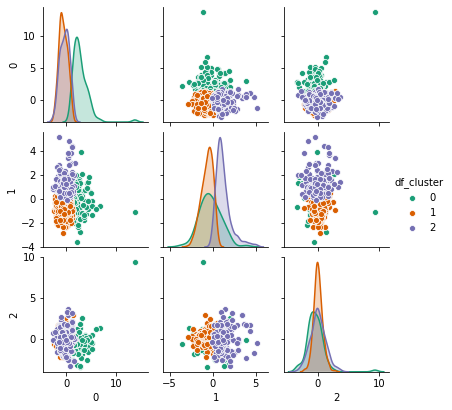

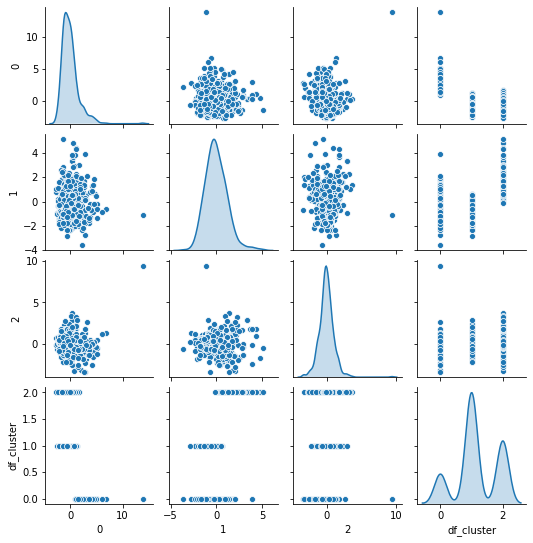

In [25]:
sns.pairplot(df1, hue='df_cluster', palette= 'Dark2', diag_kind='kde',size=1.85)
sns.pairplot(df1,palette='Dark2', diag_kind='kde',size=1.85)

In [27]:
# split PCA score into training and testing set
train_pca = df_6[:int(len(df_6)*0.6)]
test_pca = df_6[int(len(df_6)*0.6):]
train_pca.shape,X_train.shape,test_pca.shape,y_train.shape

((361, 6), (361, 9), (242, 6), (361,))

,R Square Score
Ridge,0.889329
BayesianRidge,0.889255
Lasso,0.889216
Linear,0.889216
Hubber,0.886982
SVM Linear,0.882935
RandomForest,0.734934
Bagging,0.712381
AdaBoost,0.637056
SVM RBF,0.504624


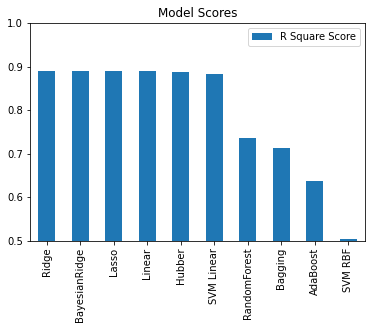

In [28]:
def sev_test(train,label):
    results={}
    def test_model(clf):
        
        cv = KFold(n_splits=5,shuffle=True,random_state=45)
        r2 = make_scorer(r2_score)
        r2_val_score = cross_val_score(clf,train,label,cv=cv,scoring = r2)
        scores=[r2_val_score.mean()]
        return scores
    
    clf = linear_model.LinearRegression()
    results['Linear']=test_model(clf)
    
    clf = linear_model.Ridge()
    results['Ridge']=test_model(clf)
    
    clf = linear_model.BayesianRidge()
    results['BayesianRidge']=test_model(clf)
    
    clf = linear_model.HuberRegressor()
    results['Hubber']=test_model(clf)
    
    clf = linear_model.Lasso(alpha=1e-4)
    results['Lasso']=test_model(clf)
    
    clf = BaggingRegressor()
    results['Bagging']=test_model(clf)
    
    clf = RandomForestRegressor()
    results['RandomForest']=test_model(clf)
    
    clf = AdaBoostRegressor()
    results['AdaBoost']=test_model(clf)
    
    clf = svm.SVR()
    results['SVM RBF']=test_model(clf)
    
    clf = svm.SVR(kernel='linear')
    results['SVM Linear']=test_model(clf)
    
    results = pd.DataFrame.from_dict(results,orient='index')
    results.columns=['R Square Score']
    results=results.sort_values(by='R Square Score', ascending = False)
    results.plot(kind='bar',title='Model Scores')
    axes = plt.gca()
    axes.set_ylim([0.5,1])
    return results

sev_test(train_pca,y_train)

In [29]:
cv = KFold(n_splits=5,shuffle=True,random_state=45)

parameters = {'alpha_1': [1e-04, 1e-05, 1e-06,1e-07],
              'alpha_2': [1e-04, 1e-05, 1e-06,1e-07],
              'lambda_1' : [1e-04, 1e-05, 1e-06,1e-07],
              'lambda_2' : [1e-04, 1e-05, 1e-06,1e-07],
              'tol' : [0.001]}

clf = linear_model.BayesianRidge()
r2 = make_scorer(r2_score)
grid_obj = GridSearchCV(clf, parameters,  cv=cv,scoring=r2)
grid_fit = grid_obj.fit(train_pca, y_train)
best_clf = grid_fit.best_estimator_ 

# inputting PCA training set
# best_clf.fit(train_pca, y_train)
# best_clf.predict(test_pca)

In [30]:
from sklearn.metrics import mean_absolute_error
y_test_pre = best_clf.predict(test_pca)
# Y_test_pred = Y_test_pred.astype(int)
y_test_true = test_df['Popularity']
MAE = mean_absolute_error(y_test_true, y_test_pre)

from sklearn.metrics import mean_squared_error
RMSE = mean_squared_error(y_test_true, y_test_pre)**0.5

# In average, the model has prediction error of ~1.2 unit.
# i.e. the predictred popularity has room of error of (y-1.2, y+1.2)
MAE, RMSE

(4.637929794065701, 9.911681877526485)